<a href="https://colab.research.google.com/github/bilgeyucel/artificial_neural_networks/blob/main/restricted_boltzmann_machines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['axes.grid'] = False

from keras.datasets import mnist
from sklearn.neural_network import BernoulliRBM

## Utility functions used in the notebook

In [3]:
def rbm_gibbs_sample_image(rbm, im, steps):
  assert len(im.shape) < 3
  if len(im.shape) == 2:
    rows = im.shape[0]
    cols = im.shape[1]
    im = im.reshape((-1))
  else:
    im = im.copy()
  for _ in range(steps):
    im = rbm.gibbs(im)
  if rows is not None and cols is not None:
    im = im.reshape((rows, cols))
  return im.astype('float32')
    
def image_palette(X, nr = 0, m = 20):
  if nr is 0:
    nr = X.shape[0]
  return np.rollaxis(np.rollaxis(X[0:nr].reshape(m, -1, 28, 28), 0, 2), 1, 3).reshape(-1, m * 28)

def remove_rows(X, start, end):
  X = X.copy()
  if len(X.shape) == 2:
    X[start:end] = 0
  elif len(X.shape) == 3:
    X[:,start:end] = 0
  return X

## Load and show the mnist data

In [4]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0],-1))
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
X_test = X_test[0:100]

11501568/11490434 [==============================] - 0s 0us/step


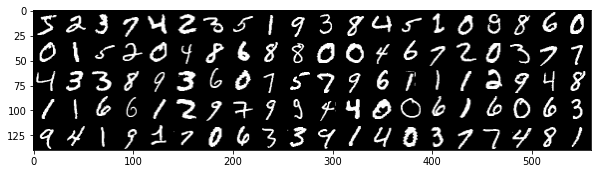

In [5]:
flattened_images = image_palette(X_train, 100)
plt.figure(figsize=(10,20))
plt.imshow(flattened_images)

## Train different RBMs
Train RBMs to see the effects of the different parameters: **n_components**, **learning_rate**, **n_iter**. 

* **n_components** refers to number of hidden units
* **n_iter** refers to epochs




RBM 1: `n_components=10, learning_rate=0.01, n_iter=10`

In [42]:
rbm = BernoulliRBM(n_components=10, learning_rate=0.01, random_state=0, n_iter=10, verbose=True)
rbm.fit(X_train)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -196.74, time = 1.86s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -196.54, time = 2.15s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -196.54, time = 2.11s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -196.41, time = 2.21s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -196.40, time = 2.13s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -188.83, time = 2.16s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -187.32, time = 2.15s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -186.71, time = 2.11s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -187.04, time = 2.14s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -187.61, time = 2.14s


BernoulliRBM(learning_rate=0.01, n_components=10, random_state=0, verbose=True)

RBM 2: `n_components=100, learning_rate=0.01, n_iter=10`

In [33]:
rbm_100 = BernoulliRBM(n_components=100, learning_rate=0.01, random_state=0, n_iter=10, verbose=True)
rbm_100.fit(X_train)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -112.01, time = 9.64s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -98.63, time = 10.61s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -91.95, time = 10.39s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -88.21, time = 10.53s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -85.44, time = 10.56s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -83.87, time = 10.59s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -81.99, time = 10.37s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -81.03, time = 10.34s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -80.59, time = 10.38s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -79.32, time = 10.78s


BernoulliRBM(learning_rate=0.01, n_components=100, random_state=0, verbose=True)

RBM 3: `n_components=10, learning_rate=0.01, n_iter=100`

In [45]:
rbm_ite100 = BernoulliRBM(n_components=10, learning_rate=0.01, random_state=0, n_iter=100, verbose=True)
rbm_ite100.fit(X_train)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -196.74, time = 2.16s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -196.54, time = 2.39s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -196.54, time = 2.61s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -196.41, time = 3.09s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -196.40, time = 2.62s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -188.83, time = 2.89s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -187.32, time = 2.87s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -186.71, time = 2.13s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -187.04, time = 2.13s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -187.61, time = 2.16s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -186.71, time = 2.15s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -186.39, time = 2.15s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -186.46, time = 2.12s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -186.37, time = 2.11s
[BernoulliRBM] 

BernoulliRBM(learning_rate=0.01, n_components=10, n_iter=100, random_state=0,
             verbose=True)

RBM 4: `n_components=100, learning_rate=0.05, n_iter=10`

In [57]:
rbm_100_learning_5 = BernoulliRBM(n_components=100, learning_rate=0.05, random_state=0, n_iter=10, verbose=True)
rbm_100_learning_5.fit(X_train)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -99.33, time = 9.33s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -91.87, time = 10.13s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -91.44, time = 10.27s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -90.00, time = 9.85s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -88.25, time = 10.42s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -88.88, time = 9.76s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -90.87, time = 9.87s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -86.19, time = 10.23s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -87.75, time = 9.83s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -87.83, time = 9.77s


BernoulliRBM(learning_rate=0.05, n_components=100, random_state=0, verbose=True)

## Sample the trained RBM and show the result
The gibbs_steps variable determines how many Gibbs sampling steps will be performed for each test image i.e. with the test images as initialization.


### RBM with `n_components=10, learning_rate=0.01, n_iter=10`
These results are not meaningful

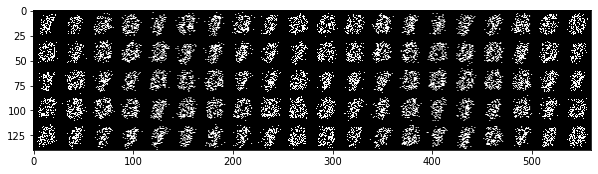

In [44]:
gibbs_steps = 15
a = X_test.copy()
for i in range(a.shape[0]):
  for j in range(gibbs_steps):
    a[i] = rbm.gibbs(a[i])
plt.figure(figsize=(10,20))
plt.imshow(image_palette(a))

### RBM with `n_components=100, learning_rate=0.01, n_iter=10`
These results are better as out hidden layers learned more information about the data.

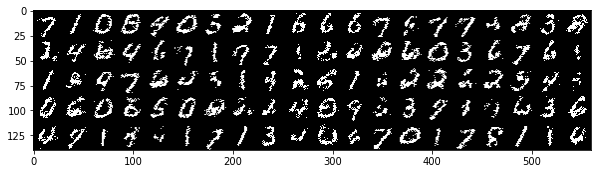

In [34]:
gibbs_steps = 15
a = X_test.copy()
for i in range(a.shape[0]):
  for j in range(gibbs_steps):
    a[i] = rbm_100.gibbs(a[i])
plt.figure(figsize=(10,20))
plt.imshow(image_palette(a))

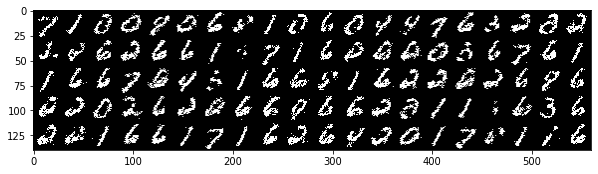

In [41]:
gibbs_steps = 100
a = X_test.copy()
for i in range(a.shape[0]):
  for j in range(gibbs_steps):
    a[i] = rbm_100.gibbs(a[i])
plt.figure(figsize=(10,20))
plt.imshow(image_palette(a))

### RBM with `n_components=10, learning_rate=0.01, n_iter=100`
Having more iterations make the predictions more meaningful yet not enough

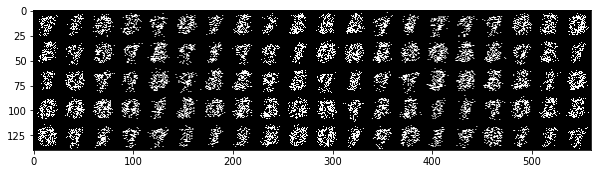

In [49]:
gibbs_steps = 15
a = X_test.copy()
for i in range(a.shape[0]):
  for j in range(gibbs_steps):
    a[i] = rbm_ite100.gibbs(a[i])
plt.figure(figsize=(10,20))
plt.imshow(image_palette(a))

### RBM with `n_components=100, learning_rate=0.05, n_iter=105`
Although some numbers are visible, compared to the test data, they are wrong

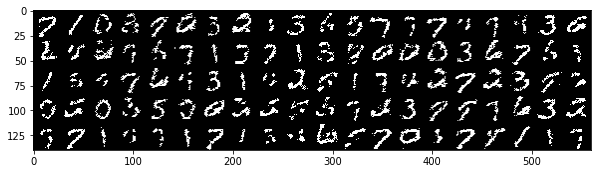

In [58]:
gibbs_steps = 15
a = X_test.copy()
for i in range(a.shape[0]):
  for j in range(gibbs_steps):
    a[i] = rbm_100_learning_5.gibbs(a[i])
plt.figure(figsize=(10,20))
plt.imshow(image_palette(a))

### Test Data

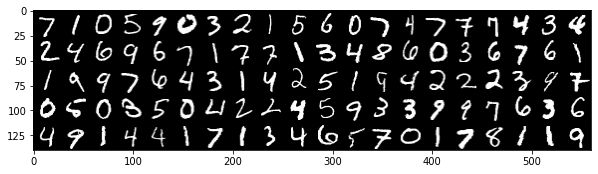

In [35]:
plt.figure(figsize=(10,20))
plt.imshow(image_palette(X_test))

## Reconstruction of unseen images
In this cell, we will remove pixel rows from certain images. Using the recently trained RBM, we will then try to reconstruct the original images.  <br/>
The following variables control this process: <br/>


*   **reconstruction_gibbs_steps**: The number of gibbs steps used to reconstruct the image.
*   **start_test_index**: The first index of the test set to use.
*   **nr**: the number of images starting from **start_test_index** to reconstruct.
*   **start_row_to_remove**:  The index of the first row that should be removed.
*   **end_row_to_remove**: The index up to which the rows should be removed.




### RBM with `10 components`
This model performs poorly even we remove the non-digit pixels.

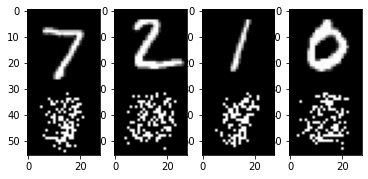

In [55]:
## RBM_10 components
reconstruction_gibbs_steps = 15
start_test_index = 0
nr = 4
start_row_to_remove = 0
end_row_to_remove = 4
to_reconstruct = X_test[start_test_index:start_test_index + nr].reshape((-1,28,28))
to_reconstruct = remove_rows(to_reconstruct, start_row_to_remove, end_row_to_remove)
reconstructed = np.zeros(to_reconstruct.shape)
for i in range(nr):
  reconstructed[i] = rbm_gibbs_sample_image(rbm, to_reconstruct[i], reconstruction_gibbs_steps)
combined_images = np.concatenate((to_reconstruct,reconstructed), axis=1)
fig = plt.figure()
for i in range(nr): 
  ax1 = fig.add_subplot(1,nr,i+1)
  ax1.imshow(combined_images[i])

plt.show()

### RBM with `100 components`
This model performs better even when we remove important pixels from the image yet not powerful enough to predict second image as `2`

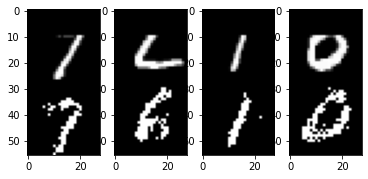

In [87]:
reconstruction_gibbs_steps = 10
start_test_index = 0
nr = 4
start_row_to_remove = 0
end_row_to_remove = 10
to_reconstruct = X_test[start_test_index:start_test_index + nr].reshape((-1,28,28))
to_reconstruct = remove_rows(to_reconstruct, start_row_to_remove, end_row_to_remove)
reconstructed = np.zeros(to_reconstruct.shape)
for i in range(nr):
  reconstructed[i] = rbm_gibbs_sample_image(rbm_100, to_reconstruct[i], reconstruction_gibbs_steps)
combined_images = np.concatenate((to_reconstruct,reconstructed), axis=1)
fig = plt.figure()
for i in range(nr): 
  ax1 = fig.add_subplot(1,nr,i+1)
  ax1.imshow(combined_images[i])

plt.show()

### RBM with `100 components` with different gibbs sampling step
When we increase the gibbs sampling step size with the same model, reconstructions are worse. Apparently, the gibbs sampling size, therefore assumptions are too high

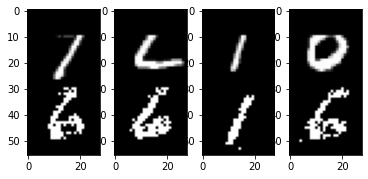

In [89]:
reconstruction_gibbs_steps = 150
start_test_index = 0
nr = 4
start_row_to_remove = 0
end_row_to_remove = 10
to_reconstruct = X_test[start_test_index:start_test_index + nr].reshape((-1,28,28))
to_reconstruct = remove_rows(to_reconstruct, start_row_to_remove, end_row_to_remove)
reconstructed = np.zeros(to_reconstruct.shape)
for i in range(nr):
  reconstructed[i] = rbm_gibbs_sample_image(rbm_100, to_reconstruct[i], reconstruction_gibbs_steps)
combined_images = np.concatenate((to_reconstruct,reconstructed), axis=1)
fig = plt.figure()
for i in range(nr): 
  ax1 = fig.add_subplot(1,nr,i+1)
  ax1.imshow(combined_images[i])

plt.show()

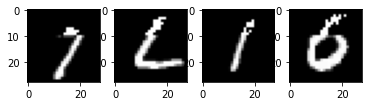

In [53]:
start_row_to_remove
end_row_to_remove
to_reconstruct[:,start_row_to_remove:end_row_to_remove] = reconstructed[:,start_row_to_remove:end_row_to_remove]
fig = plt.figure()
for i in range(nr): 
  ax1 = fig.add_subplot(1,nr,i+1)
  ax1.imshow(to_reconstruct[i])

plt.show()

## Component visualisation
In the final cell, the components (weights of each neuron) of the RBM are shown.<br/> 
Observing these components (think back to CNNs) may offer insights into the trained model.

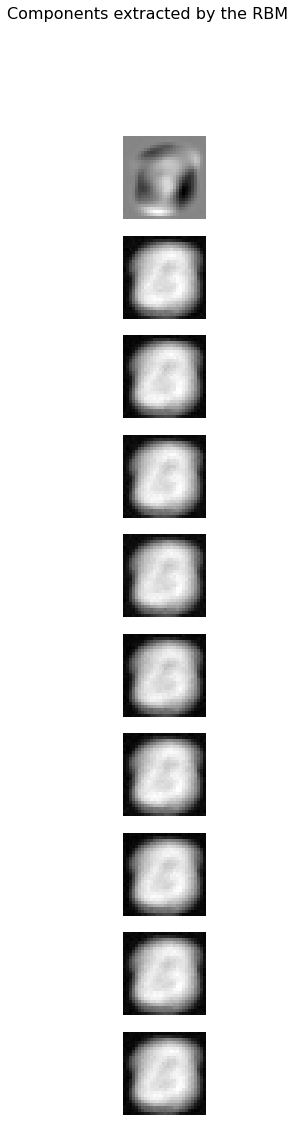

In [28]:
plt.figure(figsize=(18, 18))
nr_components = rbm.components_.shape[0]
for i in range(nr_components):
    c = rbm.components_[i]
    plt.subplot(10, np.ceil(nr_components/10), i + 1)
    plt.imshow(c.reshape((28, 28)), cmap = "gray", interpolation='nearest')
    plt.axis('off')

plt.suptitle('Components extracted by the RBM', fontsize=16);